In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mlxtend

In [5]:
df=pd.read_excel('/content/Online retail.xlsx')

In [6]:

df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [8]:
df.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


In [9]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [10]:
# Handle missing values
df.fillna('', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert the df to a suitable format for association rule mining
transactions = []
for i in range(len(df)):
    transactions.append(df.iloc[i, 0].split(','))

# Create a pandas dataframe from the transactions
df = pd.DataFrame(transactions).T

In [12]:

# Convert the DataFrame to a one-hot encoded format
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

# Calculate frequent itemsets using Apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Set appropriate threshold for support, confidence, and lift
rules = rules[(rules['support'] > 0.01) & (rules['confidence'] > 0.5) & (rules['lift'] > 1.5)]

# Print the generated rules
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                        antecedents      consequents  antecedent support  \
0              (chocolate, chicken)  (mineral water)            0.021256   
1            (chocolate, olive oil)  (mineral water)            0.023575   
2               (eggs, ground beef)  (mineral water)            0.028792   
3  (frozen vegetables, ground beef)  (mineral water)            0.024541   
4  (frozen vegetables, ground beef)      (spaghetti)            0.024541   
5               (milk, ground beef)  (mineral water)            0.031691   
6           (pancakes, ground beef)  (mineral water)            0.020870   
7                 (olive oil, milk)  (mineral water)            0.024155   
8                      (milk, soup)  (mineral water)            0.021449   
9                 (soup, spaghetti)  (mineral water)            0.020676   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.299710  0.011014    0.518182  1.728943  0.004644    1.453432   
1    

In [14]:
# Analyze the generated rules
interesting_rules = rules.nlargest(10, 'lift')

# Interpret the results and provide insights into customer purchasing behavior
print("Top 10 rules with highest lift:")
print(interesting_rules)

Top 10 rules with highest lift:
                        antecedents      consequents  antecedent support  \
4  (frozen vegetables, ground beef)      (spaghetti)            0.024541   
8                      (milk, soup)  (mineral water)            0.021449   
3  (frozen vegetables, ground beef)  (mineral water)            0.024541   
9                 (soup, spaghetti)  (mineral water)            0.020676   
6           (pancakes, ground beef)  (mineral water)            0.020870   
0              (chocolate, chicken)  (mineral water)            0.021256   
7                 (olive oil, milk)  (mineral water)            0.024155   
1            (chocolate, olive oil)  (mineral water)            0.023575   
5               (milk, ground beef)  (mineral water)            0.031691   
2               (eggs, ground beef)  (mineral water)            0.028792   

   consequent support   support  confidence      lift  leverage  conviction  \
4            0.229565  0.012560    0.511811  2.22948

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


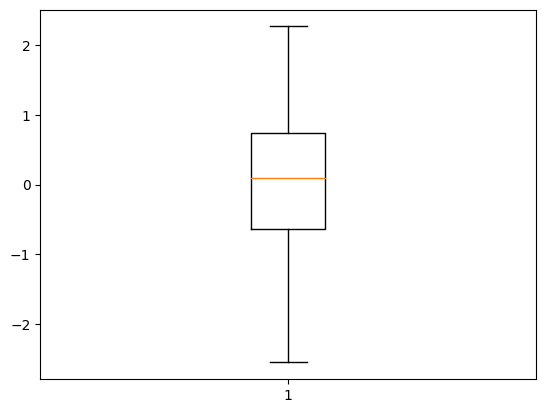

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(0)
data = np.random.normal(0, 1, 100)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot
ax.boxplot(data)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


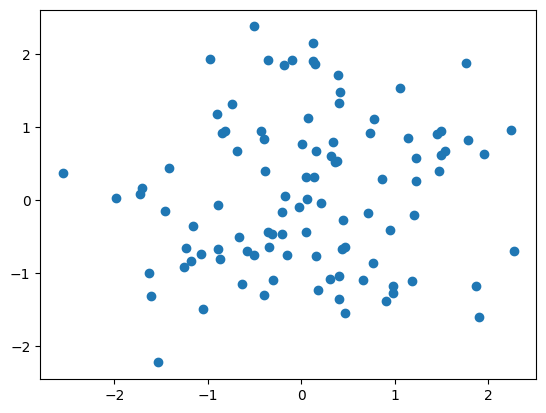

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
np.random.seed(0)
data = pd.DataFrame({
    'A': np.random.normal(0, 1, 100),
    'B': np.random.normal(0, 1, 100)
})

# Create a figure and axis
fig, ax = plt.subplots()

# Create a pairplot
ax.scatter(data['A'], data['B'])

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


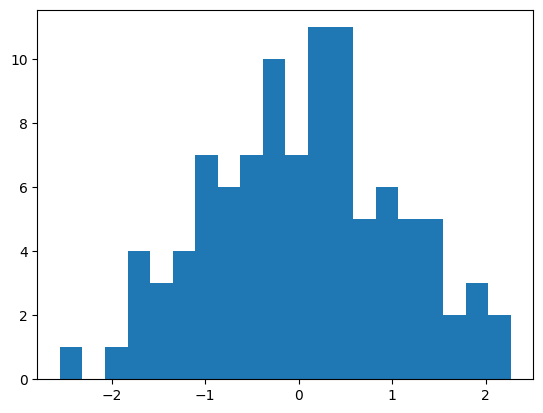

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(0)
data = np.random.normal(0, 1, 100)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a histogram
ax.hist(data, bins=20)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

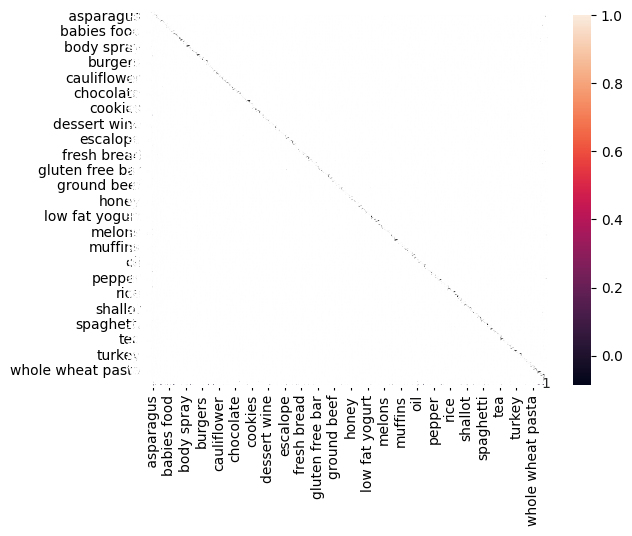

In [19]:
sns.heatmap(df.corr(), annot=True)

interview question

1. What is lift and why is it important in Association rules?

ANS: Lift measures the importance of an association rule, calculated as the ratio of observed to expected frequency under independence. A lift value > 1 indicates a positive association, while < 1 indicates a negative association. Lift helps identify the strength of the association between two items.

2. What is support and Confidence. How do you calculate them?

ANS: Support is the proportion of transactions containing the itemset, while Confidence is the proportion of transactions containing the consequent given the antecedent. Support = P(A ∩ B), Confidence = P(B|A) = P(A ∩ B) / P(A)

3. What are some limitations or challenges of Association rules mining?

 ANS:Limitations include handling large datasets
  dealing with noise and missing values
  identifying meaningful rules, overfitting,
  and scalability issues with high-dimensional data or large datasets.